In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/datasets/

/content/gdrive/My Drive/datasets


In [3]:
import numpy as np
import pandas as pd
#import statistics
df1 = pd.read_csv('housing.csv')

In [92]:
df2 = df1[['Latitude','Longitude','MedianIncome']]
df2=(df2-df2.min())/(df2.max() - df2.min())

In [93]:
df2

,Latitude,Longitude,MedianIncome
0,0.567481,0.211155,0.539668
1,0.565356,0.212151,0.538027
2,0.564293,0.210159,0.466028
3,0.564293,0.209163,0.354699
4,0.564293,0.209163,0.230776
...,...,...,...
20635,0.737513,0.324701,0.073130
20636,0.738576,0.312749,0.141853
20637,0.732200,0.311753,0.082764
20638,0.732200,0.301793,0.094295


In [ ]:
#from google.colab import files
#uploaded = files.upload()   

In [94]:
import io
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Finding Optimal k value


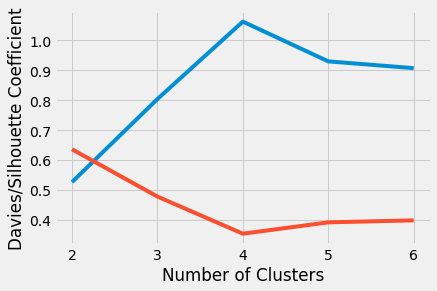

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=42)

davies_coefficients = []
silhouette_coefficients = []
kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}
n = 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2)
    score1 = davies_bouldin_score(df2, kmeans.labels_)
    score2 = silhouette_score(df2, kmeans.labels_)
    davies_coefficients.append(score1)
    silhouette_coefficients.append(score2)
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), davies_coefficients)
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies/Silhouette Coefficient")
plt.show()

In [96]:
k_opt = max(np.argmax(silhouette_coefficients)+2,np.argmin(davies_coefficients)+2)

#K-means Clustering

In [80]:
import cmath as math
import random
from random import randint
from scipy import linalg, sparse
data = df2.values
N = df2.shape[1]
M = df2.shape[0]

In [81]:
def labelling(x,p,cluster_index):
  x1 = np.column_stack([x,cluster_index])
  clusters = np.zeros((p,1))
  clusters = clusters.tolist()
  #cluster_index=np.zeros((20,1))
  #cluster_index = cluster_index.tolist()
  l = x1.shape[1]-1
  for k in range(x.shape[0]):
    for j in range(1,p+1):
      if x1[k][l] == j:
        if (type(clusters[j-1][0]) == float):
          clusters[j-1][0]= x1[k, 0:l].tolist()
          #cluster_index[j-1][0]= k
        else:
          clusters[j-1].append(x1[k, 0:l].tolist())
          #cluster_index[j-1].append(k)
  return clusters

In [82]:
def cl_centers(p,clusters):
  cluster_centres = np.zeros((p,N))
  for cl in range(len(clusters)):
    clusters[cl] = np.array(clusters[cl])
    cluster_centres[cl] = (clusters[cl]).mean(0)
  return cluster_centres

In [83]:
def updation(x,p,cluster_centres):
  dev = np.zeros((p,N))
  arg = np.zeros((p,1))
  updated_cluster_index = []
  for i in range(len(x)):
    for j in range(len(cluster_centres)):
      dev = x[i] - cluster_centres[j]
      arg[j] = (np.linalg.norm(dev))**2
    ind = np.argmin(arg)
    updated_cluster_index.append(ind+1)
  return updated_cluster_index

In [84]:
def kmeans(X,p):
  n = X.shape[0]
  randindex = np.random.randint(1,p+1,n)
  print("Iteration 1")
  print(randindex.tolist())
  randindex = np.array(randindex, copy=False, subok=True, ndmin=2).T
  clus = labelling(X,p,randindex)
  c_mean = cl_centers(p,clus)
  newindex = updation(X,p,c_mean)
  termination = np.zeros((n,1))
  iter = 1
  c = 0
  while True:
    iter +=1
    clus = labelling(X,p,newindex)
    c_mean = cl_centers(p,clus)
    oldindex = newindex
    newindex = updation(X,p,c_mean)
    print("Iteration ",iter)
    print(newindex)
    ter_cond = np.array(newindex)-np.array(oldindex)
    if all([ v == 0 for v in ter_cond]):
      c += 1
      if c == 20:
        break
      else:
        continue
    else:
      continue
      c = 0
    #if iter == 300:
      #break
    #else:
      #continue
  return clus,newindex

Iteration 1
[2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 

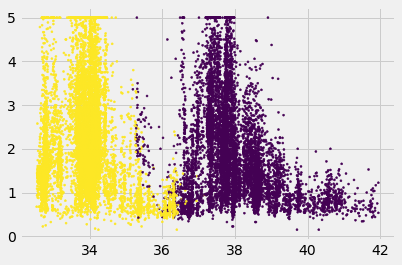

In [85]:
cluster, cl_index = kmeans(data,k_opt)
plt.scatter(df1['Latitude'].tolist(),df1['MedianHouseValue'].tolist(),s=4,c=cl_index)
plt.show()
#ax = plt.axes(projection ="3d")
#fig = plt.figure(figsize = (100,100))
# Creating plot
#ax.scatter3D(-data[:,0], data[:,1], data[:,2], c = cl_index)

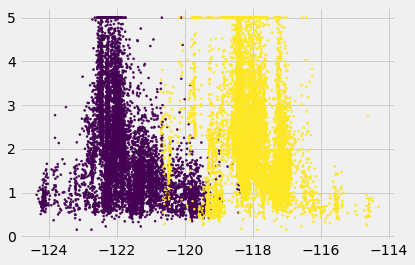

In [86]:
plt.scatter(df1['Longitude'].tolist(),df1['MedianHouseValue'].tolist(),s=4,c=cl_index)
plt.show()

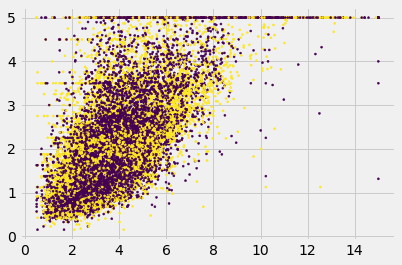

In [87]:
plt.scatter(df1['MedianIncome'].tolist(),df1['MedianHouseValue'].tolist(),s=4,c=cl_index)
plt.show()

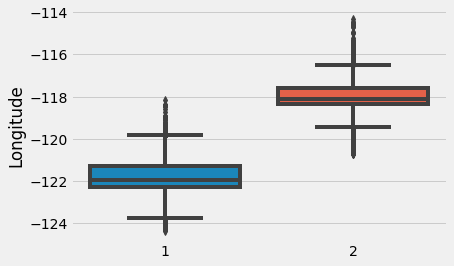

In [88]:
import seaborn as sns
sns.boxplot(y = df1['Longitude'],
            x = cl_index)

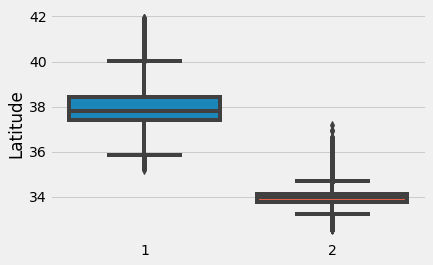

In [89]:
import seaborn as sns
sns.boxplot(y = df1['Latitude'],
            x = cl_index)

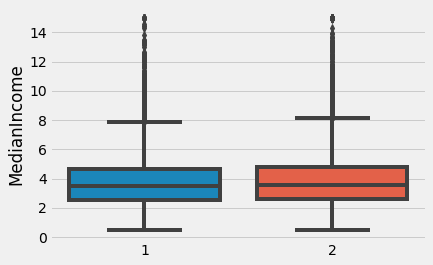

In [90]:
import seaborn as sns
sns.boxplot(y = df1['MedianIncome'],
            x = cl_index)

In [91]:
cluster

[array([[0.5674814 , 0.21115538, 0.53966842],
        [0.565356  , 0.21215139, 0.53802706],
        [0.5642933 , 0.21015936, 0.46602805],
        ...,
        [0.73219979, 0.31175299, 0.08276438],
        [0.73219979, 0.30179283, 0.09429525],
        [0.72582359, 0.30976096, 0.13025338]]),
 array([[0.06163656, 0.87948207, 0.09512972],
        [0.06269926, 0.87948207, 0.11469497],
        [0.06163656, 0.88047809, 0.11041917],
        ...,
        [0.18597237, 0.55976096, 0.472759  ],
        [0.18597237, 0.56075697, 0.38184991],
        [0.18597237, 0.55976096, 0.44451111]])]